In [86]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
np.set_printoptions(precision=4)
                    
np.lat=np.radians(-30.7148) #latitude of KAT7
coslat=np.cos(lat)
sinlat=np.sin(lat)


def azel(ha,dec):    #elevation and azimuth
    """
    ha,dec => az,el
    All values are in degrees
    az 180 is SOUTH
    """
    d=np.radians(dec)
    h=np.radians(ha)
    
    elev=np.arcsin((np.sin(d)*sinlat +np.cos(d)*np.cos(h)*coslat))                    #el
    azim=np.arctan2(-1*(np.cos(d)*np.sin(h)),-1* (np.cos(d)*np.cos(h)*sinlat-np.sin(d)*coslat))#az   
    azimuth=np.degrees(azim)
    elevation=np.degrees(elev)
    return (azimuth,elevation)
   



Populating the interactive namespace from numpy and matplotlib


In [87]:
def hadec(az,el):
    """
    az,el => ha,dec
    All values are in degrees
    az 0 is NORTH
    """
    a=np.radians(az)
    e=np.radians(el)
    x= -np.cos(a)*np.cos(e)*sinlat +np.sin(e)*coslat
    y= -np.sin(a)*np.cos(e)
    z=  np.cos(a)*np.cos(e)*coslat +np.sin(e)*sinlat
    r= np.sqrt(x*x +y*y)
    ha= np.arctan2(y,x)
    dec=np.arctan2(z,r)
    hour_angle=np.degrees(ha)
    declination=np.degrees(dec)
    return (hour_angle,declination)



In [88]:
lst = 18.7 #hours
ra=330.0 #degrees
dec=1.5 #degrees
ha=lst*15-ra
print ha,dec
print azel(ha,dec)

-49.5 1.5
(65.02198873763543, 33.009775298880214)


In [89]:
print azel(-36., 1.5)

(53.450149336240045, 42.993843903627955)


In [109]:
print hadec(51.56483, 41.20536)

(-36.199581712800395, 3.7616678062763254)


In [110]:
%precision 3
dec0=3.76166780627
scan=8.33333 # degree
lst0=18.7*15 # hour angle in hours  to degrees
ra0=-36.199-lst0
ha0=-36.199581
print "RA0",ra0, "Dec",dec0
az0=51.56483  # az start in degreees
duration=100/1.00273791552838 #sidereal seconds
dur_hr=duration/3600. # seconds to hours 
dur_d=15*dur_hr #1 hour in HA is 15 degreees
timestep=100./3600. # hours
hastep=timestep*15.0  # 1 hour= 15 deg
print hastep
print dur_d, duration/240.
# 54 scans, 27 forward and 27 back
ras =np.zeros(54)
decs=np.zeros(54)
has=np.zeros(54)
azs=np.zeros(54)
els=np.zeros(54)
el0=41.20536 # stays the same
az0=51.56483
print hadec(el0,az0)
for scan_num in range(54):
    el=el0
    if scan_num%2 == 0 : #even scan
        az=az0-scan
    else: # odd scan
        az=az0+scan
    # have now finished scan at different az, el
    # change to ha,dec
    print az,el0
    ha,dec=hadec(az,el0)# work out where you are
    ha=ha0+hastep*scan_num # increment time
    az,el=azel(ha,dec)
    print ("Az %10.3f El %10.3f") %(az,el0)
    print ("HA %10.3f Dec %10.3f") % (ha,dec)
    ra=lst0+ha
    print("RA %10.3f Dec %10.3f") %(ra,dec)
    azs[scan_num]=az
    els[scan_num]=el
    has[scan_num]=ha
    ras[scan_num]=ra
    decs[scan_num]=dec


RA0 -316.699 Dec 3.76166780627
0.416666666667
0.41552898341 0.41552898341
(-24.17373402293906, 0.11398638100367683)
59.89816 41.20536
Az     55.772 El     41.205
HA    -36.200 Dec     -0.692
RA    244.300 Dec     -0.692
43.2315 41.20536
Az     47.740 El     41.205
HA    -35.783 Dec      7.747
RA    244.717 Dec      7.747
59.89816 41.20536
Az     54.943 El     41.205
HA    -35.366 Dec     -0.692
RA    245.134 Dec     -0.692
43.2315 41.20536
Az     46.925 El     41.205
HA    -34.950 Dec      7.747
RA    245.550 Dec      7.747
59.89816 41.20536
Az     54.097 El     41.205
HA    -34.533 Dec     -0.692
RA    245.967 Dec     -0.692
43.2315 41.20536
Az     46.096 El     41.205
HA    -34.116 Dec      7.747
RA    246.384 Dec      7.747
59.89816 41.20536
Az     53.234 El     41.205
HA    -33.700 Dec     -0.692
RA    246.800 Dec     -0.692
43.2315 41.20536
Az     45.254 El     41.205
HA    -33.283 Dec      7.747
RA    247.217 Dec      7.747
59.89816 41.20536
Az     52.353 El     41.205
HA    -32.

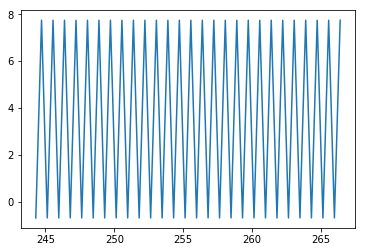

In [111]:
plt.plot(ras,decs)

NameError: name 'elev' is not defined

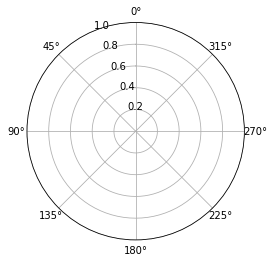

In [112]:

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)


hadeg=np.linspace(0,360,304) # lots of steps entries 
ha=np.radians(hadeg)
for decdeg in np.arange(-80,50,20):  # hadeg is HA in degrees, decdeg is Dec in degrees
    dec=np.radians(decdeg)
    azel=elev(ha,dec)
    az=azel[0]
    el=azel[1]
    za=np.pi/2.0 - el # zenith angle
    t2=np.tan(za/2.0) # tan/2 zenith angle

    #print ha,dec,az,el,t2,s
    ax.plot(az,t2,label="Dec "+str(decdeg),linestyle="--")
#
decdeg=np.linspace(-90,50,300)
dec=np.radians(decdeg)
for hadeg in np.arange(0,360,45):
    ha=np.radians(hadeg)
    azel=elev(ha,dec)
    az=azel[0]
    el=azel[1]
    za=np.pi/2.0 - el # zenith angle
    t2=np.tan((za)/2.0) # tan (0.5 *zenith angle)

    #print ha,dec,az,el,t2,s
    ax.plot(az,t2,label="HA "+str(hadeg),linestyle="-.") 

#plt.xlabel("Az")
#plt.ylabel("El")
#plt.ylim(0,90)
#plt.xlim(-180,180)

ax.set_rmax(1.0)

ax.legend( loc=(1.,0.),ncol=1) # 
plt.title('Azimuth versus $tan(ZA/2)$')
zas=np.tan(np.radians([10,20,30,40])) # 20,40,60,80 deg from zenith
plt.rgrids(zas,labels=['$el=70^\circ$','$el=50^\circ$','$el=30^\circ$','$el=10^\circ$'])
plt.show()




In [ ]:
plt.plot(ras,decs)

In [ ]:
pylab.figure(figsize=(15,15))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)


"""
Given azimuth and elevations work out HA,Dec and plot them

Not working yet

"""


azdeg=np.linspace(-180,180,304) # lots of steps entries 
az=np.radians(azdeg)
for eldeg in np.arange(0,90,20):  # hadeg is HA in degrees, decdeg is Dec in degrees
    el=np.radians(eldeg)
    had=hadec(az,el)
    ha=had[0]
    dec=had[1]
    t2=np.tan((dec+0.5*np.pi)/2.0) # tan/2 zenith angle
 
    ax.plot(ha,t2,label="El "+str(eldeg),linestyle="--")
#
eldeg=np.linspace(0,90,300)
el=np.radians(eldeg)
for azdeg in np.arange(0,360,45):
    #print azdeg
    az=np.radians(azdeg)
    had=hadec(az,el)
    ha=had[0]
    dec=had[1]
    t2=np.tan((dec+0.5*np.pi)/2.0) # tan (0.5 *dec)
    ax.plot(ha,t2,label="Az "+str(azdeg),linestyle="-") 

ax.set_rmax(1.0)

ax.legend( loc=(1.,0.),ncol=1) # 
plt.title('HA versus $-tan((\delta + \pi/2)/2)$')
decs=np.tan(np.radians([10,20,30,40])) # 20,40,60,80 deg 
# add 90 deg for labels
plt.rgrids(decs,labels=['$dec=-70^\circ$','$dec=-50^\circ$','$dec=-30^\circ$','$dec=-10^\circ$'])
# centre of the circle is dec = -90deg, corrsesponds to azim =-180, el=30.7
#outer edge is dec=0
# 
plt.show()


In [ ]:
#az=np.pi #radians
#el=0.5*np.pi
az=1.
el=1.
had=hadec(az,el)
h=had[0]
d=had[1]
print h,d ,np.degrees(d)

In [ ]:
print elev(h,d)

In [ ]:
print hadec(0., -0.5*np.pi)

In [ ]:
print elev(0.4803580904599507, -0.17978567500052758)

In [ ]:
print hadec(-az,el)

In [ ]:
(3.4644-0.48035)/np.pi

In [ ]:
for h in arange(0,3,0.4):
    for d in arange (0.1,-1.3,-0.2):
        a,e=elev(h,d)
        h2,d2=hadec(a,e)
        print("%6.3f %6.3f %6.3f %6.3f %6.3f %6.3f") %(a,e,h-h2,d-d2,h,d)